### Estimación de ventas por trimestre

In [46]:
#Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [47]:
df = pd.read_csv('GW-M1_HC2.csv', sep=',')

In [48]:
df

,Trimestre,Ventas
0,1,133
1,2,292
2,3,283
3,4,283
4,5,302
5,6,400
6,7,505
7,8,608
8,9,667
9,10,783


Scatter plot de las ventas por trimestre

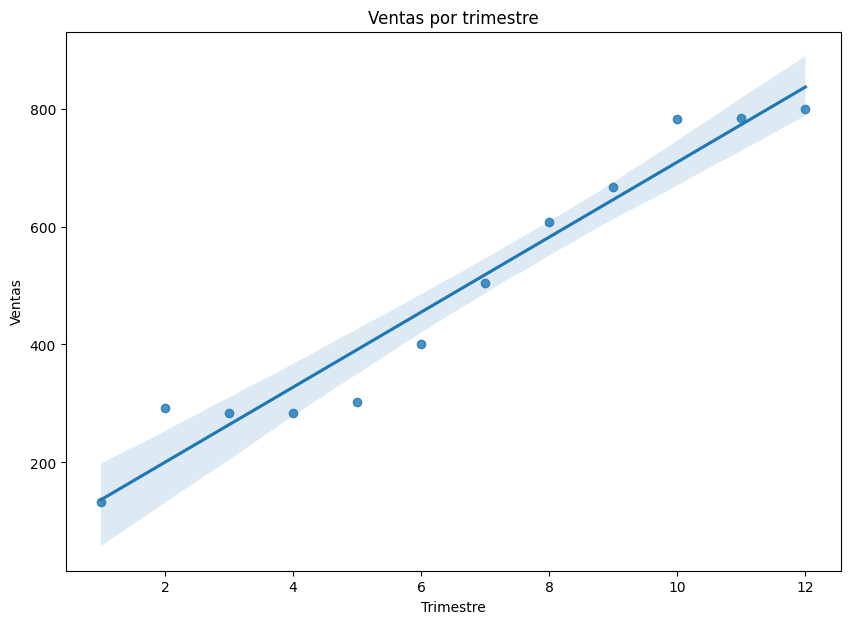

In [49]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.regplot(data=df, x='Trimestre', y='Ventas', ax=ax)
plt.title('Ventas por trimestre')
plt.show()

In [50]:
#Ecuacion de la recta de regresion
pendiente, ordenada = np.polyfit(df['Trimestre'], df['Ventas'], deg=1)
print('y = {}x + {}'.format(pendiente, ordenada))
#Esteticamente se puede escribir como:
print('y = {:.2f}x + {:.2f}'.format(pendiente, ordenada))

y = 63.65734265734263x + 72.8939393939392
y = 63.66x + 72.89


In [51]:
#Calcular el coeficiente de correlacion
corr = np.corrcoef(df['Trimestre'], df['Ventas'])
print('Coeficiente de correlacion: {}'.format(corr[0, 1]))
#Calcular el valor de R2 (coeficiente de determinacion)
r2 = np.corrcoef(df['Trimestre'], df['Ventas'])[0, 1]**2
print('R2 = {}'.format(r2))


Coeficiente de correlacion: 0.975060512910767
R2 = 0.9507430038378081


In [52]:
#Definir el modelo
modelo = LinearRegression()
#Entrenar el modelo
modelo.fit(df[['Trimestre']], df['Ventas'])

LinearRegression()

In [54]:
#Obtener los coeficientes
print('Pendiente: {}'.format(modelo.coef_))
print('Ordenada: {}'.format(modelo.intercept_))

Pendiente: [63.65734266]
Ordenada: 72.89393939393966


In [57]:
#Predecir los valores
predicciones = modelo.predict(df[['Trimestre']])
#Agregar las predicciones al dataframe y calcular el error
df['Predicciones'] = predicciones
df['Error'] = df['Predicciones'] - df['Ventas']

In [58]:
df

,Trimestre,Ventas,Predicciones,Error
0,1,133,136.551282,3.551282
1,2,292,200.208625,-91.791375
2,3,283,263.865967,-19.134033
3,4,283,327.523310,44.523310
4,5,302,391.180653,89.180653
5,6,400,454.837995,54.837995
6,7,505,518.495338,13.495338
7,8,608,582.152681,-25.847319
8,9,667,645.810023,-21.189977
9,10,783,709.467366,-73.532634


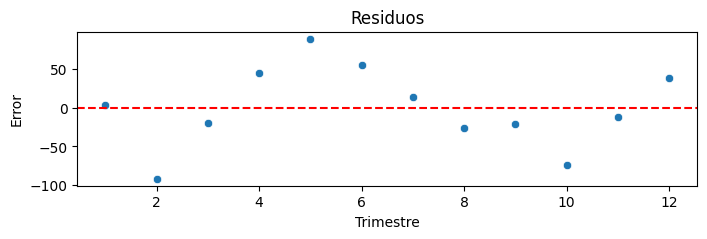

In [63]:
#Grafico de los residuos
fig, ax = plt.subplots(figsize=(8, 2))
sns.scatterplot(data=df, x='Trimestre', y='Error', ax=ax)
ax.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos')
plt.show()

In [67]:
#Para el calculo de la recta de regresion se debe calcular:
#Sumantoria de x:
sum_x = df['Trimestre'].sum()
#Sumantoria de y:
sum_y = df['Ventas'].sum()
#Sumantoria de x^2:
sum_x2 = (df['Trimestre']**2).sum()
#Sumantoria de xy:
sum_xy = (df['Trimestre']*df['Ventas']).sum()
#Tenemos que la pendiente es igual a:
pendiente = (sum_xy - (sum_x*sum_y)/len(df)) / (sum_x2 - (sum_x**2)/len(df))
#len(df) es igual a n (numero de datos)
#La ordenada es igual a:
ordenada = (sum_y - pendiente*sum_x) / len(df)
#La ecuacion de la recta de regresion es:
print('y = {}x + {}'.format(pendiente, ordenada))

y = 63.65734265734266x + 72.89393939393933


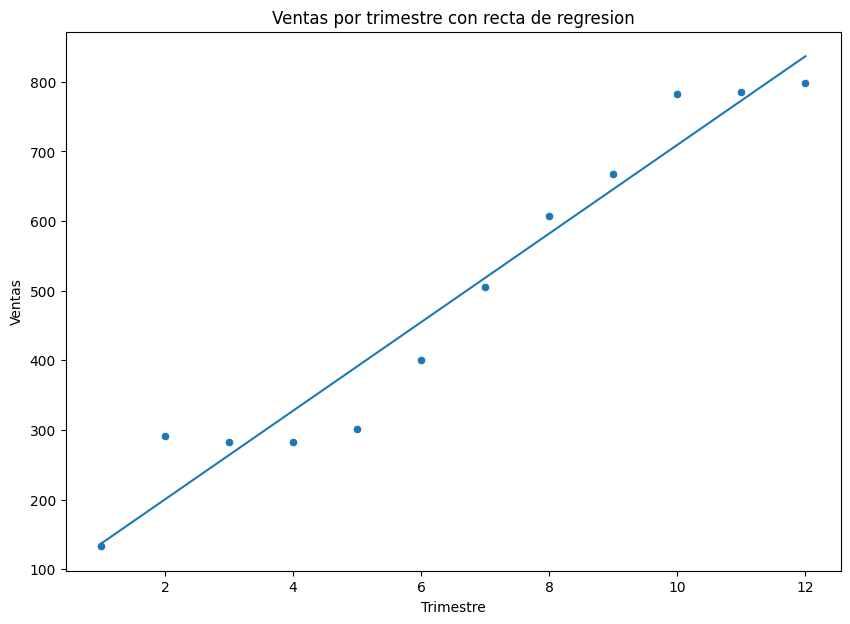

In [69]:
#Graficando la recta de regresion
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=df, x='Trimestre', y='Ventas', ax=ax)
#Graficar la recta 63.6573x + 72.8939
sns.lineplot(data=df, x='Trimestre', y=pendiente*df['Trimestre'] + ordenada, ax=ax)
plt.title('Ventas por trimestre con recta de regresion')
plt.savefig('Ventas por trimestre con recta de regresion.png', dpi=150)
plt.show()

In [70]:
#Pronosticar la demanda de los trimestres 13, 14 y 15
#Lo podemos hacer utilizando la ecuacion de la recta de regresion 63.66x + 72.89
pronostico = [pendiente * x + ordenada for x in [13, 14, 15]]
print('Pronostico para los trimestres 13, 14 y 15: {}'.format(pronostico))
#O utilizando el modelo de regresion lineal
x = pd.DataFrame({'Trimestre': [13, 14, 15]})
pronostico = modelo.predict(x)
print('Pronostico para los trimestres 13, 14 y 15: {}'.format(pronostico))

Pronostico para los trimestres 13, 14 y 15: [900.439393939394, 964.0967365967366, 1027.7540792540792]
Pronostico para los trimestres 13, 14 y 15: [ 900.43939394  964.0967366  1027.75407925]
